In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Problem 

- While the average rate of churn experienced little change, some sectors saw significant increases. The highest churn rate increase of 102% was in the banking sector, which saw the number of customers switching more than double from 12.2% to 24.6%.
    - Source : https://www.globenewswire.com/news-release/2020/05/11/2030784/0/en/British-Businesses-Lose-Nearly-5-Billion-due-to-Unplanned-Customer-Churn.html

- Customer Churn


### Goals

- Finding out types of customers that most likely to churn
- Finding out country that has the highest numbers of churn customers
- Finding out does Credit Score and churn in banking has a correlation



In [25]:
df= pd.read_csv('bank.csv')
df.head()

# Checking dataframe get general understanding of a data frame 


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
df.isna().sum()

#Checking the number of the number of null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [28]:
df.describe()

# the average customer of this bank data has more than one products
# more than half of the customer has a credit card in this bank
# the average estimated salary for all the customers is more than 100.000 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
df.describe(include = 'O')

# this bank dataset has dataset of customers from 3 different countries
# majority of the gender in the data set is male with 5457 customers
# Frace are the countries with the highest number of customers in the dataset

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [30]:
for column in df.columns:
    print(column, ':')
    print(df[column].unique())
    
# just to check all the unique value in each columns 
# the longest tenure for this data set is 10 months 
# 

RowNumber :
[    1     2     3 ...  9998  9999 10000]
CustomerId :
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname :
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore :
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 7

### Dropping Unecessary Columns

- for ethical reason i will remove all the personal information that's unrelated to the analysis
- i will be dropping row number column as well since the index has the row number as well , so the column is uneccesary

In [33]:
df.drop(columns = ['RowNumber','Surname'], inplace = True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Renaming the columns

In [34]:
## I renamed the columns just because my own preferences

df.columns = ['customer_id', 'credit_score', 'country', 'gender', 'age','tenure','balance','num_of_products','has_cr_card','is_active_member','estimated_salary','exited']
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Checking Distribution and the outliers in the data

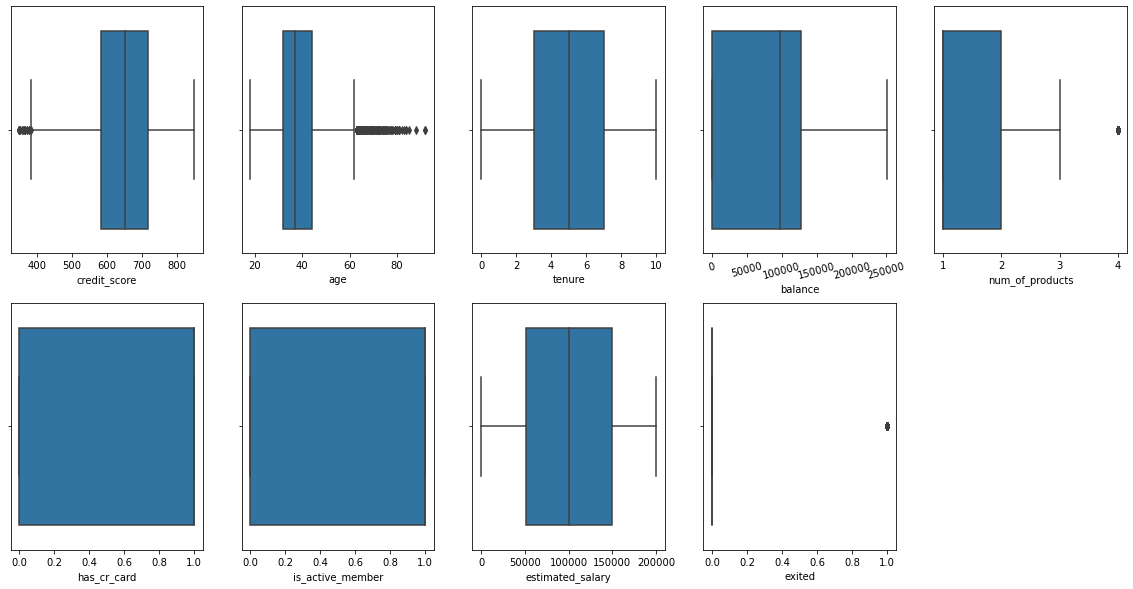

In [56]:
x = 1
plt.figure(figsize =( 20, 10))
for i in df.describe().columns:
    if i == 'customer_id':
        pass
    
    elif i == 'balance':
        plt.subplot(2,5,x)
        sns.boxplot(i, data = df)
        plt.xticks(rotation = 15)
        x+=1
        
    else:
        plt.subplot(2,5,x)
        sns.boxplot(i, data = df)
        x+= 1
plt.tight_layout
plt.show()

## as we can see from this boxplots there are few outliers in credit score columns , age, num_of_products
# the exited columns because is categorical the outliers that shown in the chart is the max value of the column itself and it means the customer exited

# We are not going to treat any of the outliers because it might have a valuable insight for our analysis

### Preparation

Grouping credit score based on Fico Score to create new columns
- Score :
    - 300 to 579 = Poor
    - 580 to 669 = Fair
    - 670 to 739 = Good
    - 740 to 799 = Very Good
    - 800 to 850 = Exceptional

<br>
Source : <b>https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/</b>


In [61]:
df.loc[(df['credit_score'] >= 300) & (df['credit_score'] < 580), 'credit_score_group'] = 'Poor'
df.loc[(df['credit_score'] >= 580) & (df['credit_score'] < 670), 'credit_score_group'] = 'Fair'
df.loc[(df['credit_score'] >= 670) & (df['credit_score'] < 740), 'credit_score_group'] = 'Good'
df.loc[(df['credit_score'] >= 740) & (df['credit_score'] < 800), 'credit_score_group'] = 'Very Good'
df.loc[df['credit_score'] >= 800, 'credit_score_group'] = 'Exceptional'
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,credit_score_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional


# EDA Process

### Univariate Analysis

In [66]:
df['country'].value_counts()

## as we can see that majority of the customer are from France, then next Germany, and last is Spain

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [68]:
df['num_of_products'].value_counts(normalize = True)

# 95 % of the customers in this dataset has one or 2 products that the bank offer

1    0.5084
2    0.4590
3    0.0266
4    0.0060
Name: num_of_products, dtype: float64

In [71]:
df['has_cr_card'].value_counts(normalize = True)

# 70% of the customers in this dataset has a credit card 

1    0.7055
0    0.2945
Name: has_cr_card, dtype: float64

In [76]:
df['exited'].value_counts(normalize = True)

# this bank has a churn rate of 20% which is not bad compared to the article that mention has 24% churn rate

0    0.7963
1    0.2037
Name: exited, dtype: float64

In [79]:
df['credit_score_group'].value_counts(normalize = True).round(2)

# of all the customers only 24% of total customers has a poor credit score

Fair           0.33
Good           0.24
Poor           0.24
Very Good      0.12
Exceptional    0.07
Name: credit_score_group, dtype: float64

In [80]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited', 'credit_score_group'],
      dtype='object')

## Multivariate Analysis

In [83]:
pd.crosstab(index = df['gender'], columns = df['exited'], normalize = 'columns')

#  Female Customers are more likely to churn compared to male customers

exited,0,1
gender,,
Female,0.427477,0.559156
Male,0.572523,0.440844


In [107]:
pd.crosstab(index = df['exited'], columns =  df['credit_score_group'], normalize = 'columns').round(2)

# Credit score doesn't have major implication to the churn rate

credit_score_group,Exceptional,Fair,Good,Poor,Very Good
exited,,,,,
0,0.8,0.79,0.81,0.78,0.79
1,0.2,0.21,0.19,0.22,0.21


In [85]:
pd.crosstab(index = df['gender'], columns = [df['exited'], df['credit_score_group']], normalize = 'columns').round(2)

# Female with a fair credit score have the highest churn rate among all groups
# while men with fair credit score group have the highest retention rate 
# in general male has a higher retention rate compared to female

exited                       0                                       1        \
credit_score_group Exceptional  Fair  Good  Poor Very Good Exceptional  Fair   
gender                                                                         
Female                    0.43  0.42  0.43  0.43      0.43        0.54  0.58   
Male                      0.57  0.58  0.57  0.57      0.57        0.46  0.42   

exited                                    
credit_score_group  Good  Poor Very Good  
gender                                    
Female              0.57  0.52      0.58  
Male                0.43  0.48      0.42

In [88]:
pd.crosstab(index = df['gender'], columns = df['exited'], values =df['age'], aggfunc = 'median')
# for both male and female the median age for churned customers are 45
# i used median in this because of the outliers in the age columns
# older customers are more likely to churn

exited,0,1
gender,,
Female,36,45
Male,36,45


In [108]:
pd.crosstab(index = df['country'], columns = df['exited'],normalize = 'columns' )

# France has the highest retention rate 
# while germany has the highest churn rate

exited,0,1
country,,
France,0.527942,0.397644
Germany,0.212859,0.399607
Spain,0.259199,0.202749


In [94]:
pd.crosstab(index = df['gender'], columns = [df['exited'], df['country']],normalize = 'columns' )

# Among all group, men from Spain has the highest retention rate 
# Among all group, women from France has the highest churn rate 

exited          0                             1                    
country    France   Germany     Spain    France   Germany     Spain
gender                                                             
Female   0.428402  0.439528  0.415698  0.567901  0.550369  0.559322
Male     0.571598  0.560472  0.584302  0.432099  0.449631  0.440678

In [98]:
pd.crosstab(index = df['gender'], columns = [df['exited'], df['num_of_products']],normalize = 'columns' )

# the retention rate of customers who has 4 products is 0%!


exited                  0                             1                      \
num_of_products         1         2         3         1         2         3   
gender                                                                        
Female           0.417415  0.436115  0.434783  0.540809  0.603448  0.586364   
Male             0.582585  0.563885  0.565217  0.459191  0.396552  0.413636   

exited                     
num_of_products         4  
gender                     
Female           0.633333  
Male             0.366667

In [105]:
pd.crosstab(index = df['exited'], columns = df['num_of_products'], normalize = 'columns')
# customers that has 2 products has the highest retention rate 
# customers who has more than 2 products has a high chances to churn

num_of_products,1,2,3,4
exited,,,,
0,0.722856,0.924183,0.172932,0.0
1,0.277144,0.075817,0.827068,1.0


In [103]:
pd.crosstab(index = df['exited'], columns = df['has_cr_card'], normalize = 'columns')

# having credit card has almost has no implication to the churn because the churn rate of customers that have credit card
# and who doesn't almost similar

has_cr_card,0,1
exited,,
0,0.791851,0.798157
1,0.208149,0.201843


In [109]:
pd.crosstab(index = df['exited'], columns = df['tenure'], normalize = 'columns')

# Tenure doesn't seems to have a major implication to churn

tenure,0,1,2,3,4,5,6,7,8,9,10
exited,,,,,,,,,,,
0,0.769976,0.775845,0.808206,0.7889,0.794742,0.793478,0.797311,0.827821,0.807805,0.783537,0.793878
1,0.230024,0.224155,0.191794,0.2111,0.205258,0.206522,0.202689,0.172179,0.192195,0.216463,0.206122


In [130]:
pd.crosstab(index = df['exited'], columns = df['is_active_member'], normalize = 'columns')

# active customers are more likely to retain as customer compared to the non active customers

is_active_member,0,1
exited,,
0,0.731491,0.857309
1,0.268509,0.142691


In [114]:
df.groupby('exited')['balance'].mean()

# the average balance for churned customer is higher than customer who retained

exited
0    72745.296779
1    91108.539337
Name: balance, dtype: float64

In [168]:
df.groupby('exited')['credit_score'].mean()


exited
0    651.853196
1    645.351497
Name: credit_score, dtype: float64

In [173]:
df.groupby('credit_score_group')['exited'].mean()

# the poor credit score group has the highest churn rate

credit_score_group
Exceptional    0.195420
Fair           0.205644
Good           0.186161
Poor           0.220152
Very Good      0.205882
Name: exited, dtype: float64

In [129]:
df.groupby('age')['exited'].count().sort_values(ascending = False).head(10) / len(df.index)

# customers who's in their 30's are more likely to churn than any other age group

age
37    0.0478
38    0.0477
35    0.0474
36    0.0456
34    0.0447
33    0.0442
40    0.0432
39    0.0423
32    0.0418
31    0.0404
Name: exited, dtype: float64

In [111]:
df.corr()

,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


# Visualization

<b> Churn and Retained Customers

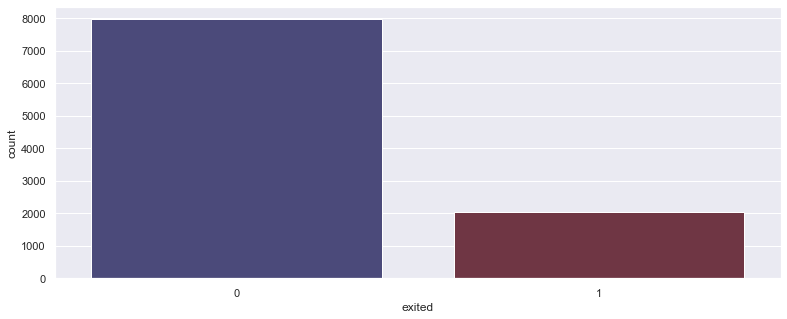

In [137]:
sns.set(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
plt.figure(figsize = (13, 5))

sns.countplot('exited',data = df, palette = 'icefire')

# This bank has churned rate of 20 %

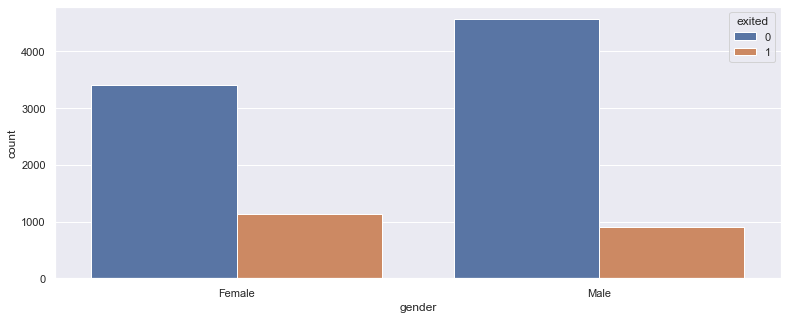

In [158]:
plt.figure(figsize = (13, 5))
sns.countplot('gender', data = df, hue = 'exited')

# Female has a higher churn rate compared to men

In [138]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited', 'credit_score_group'],
      dtype='object')

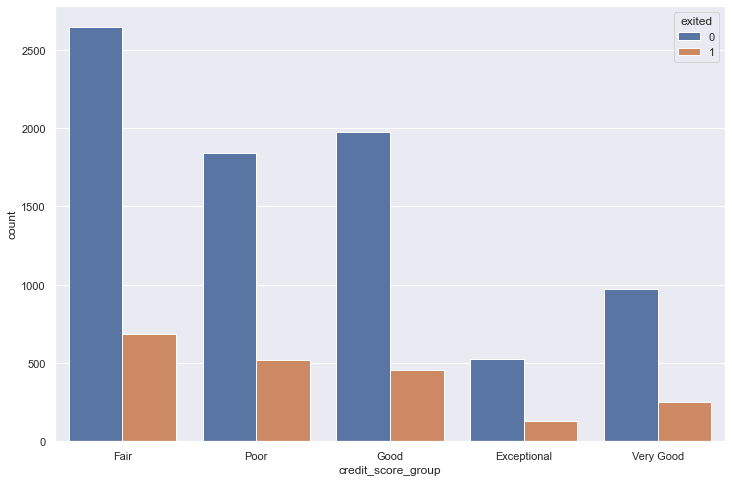

In [175]:
plt.figure(figsize = (12, 8))
sns.countplot('credit_score_group', data = df, hue = 'exited')

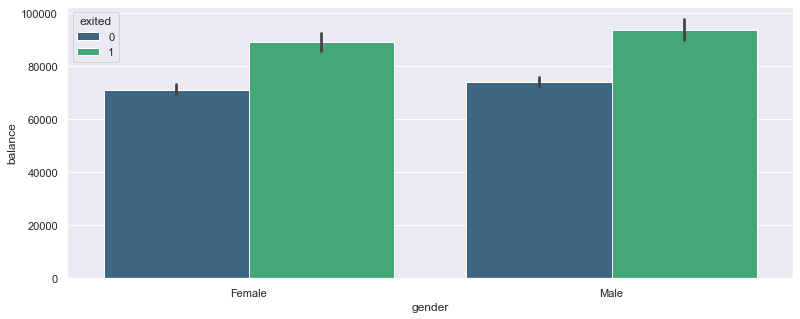

In [159]:
plt.figure(figsize = (13, 5))
sns.barplot(x = 'gender', y = 'balance', hue = 'exited', data = df, palette = 'viridis')

# In General men and women who churned has a higher balance in their account compared to retained customers

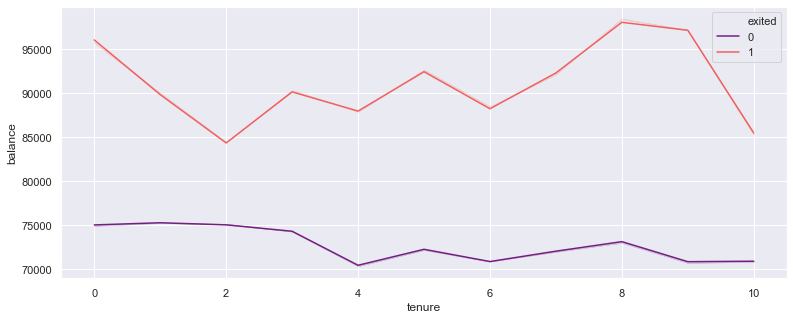

In [160]:
plt.figure(figsize = (13, 5))
sns.lineplot(x = 'tenure', y = 'balance', hue = 'exited', data = df, palette = 'magma', ci = False)

# Customer who churned has more fluctuative compared to the retained customers

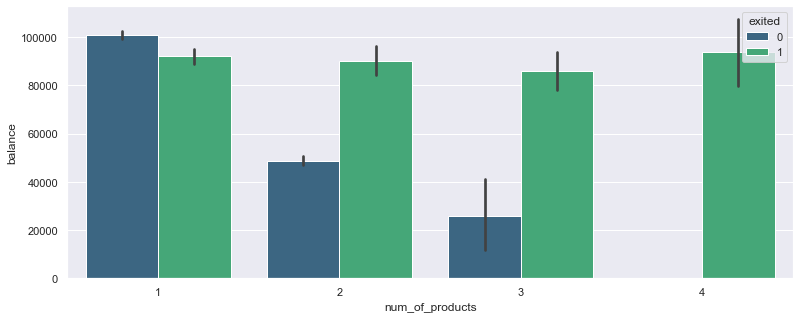

In [161]:
plt.figure(figsize = (13, 5))
sns.barplot(x = 'num_of_products', y = 'balance', hue = 'exited', data = df, palette = 'viridis')

# for customer who's not churned the the more the products that they have the lower the balance
# while for churned customers the number of the product doesn't really affect their balance

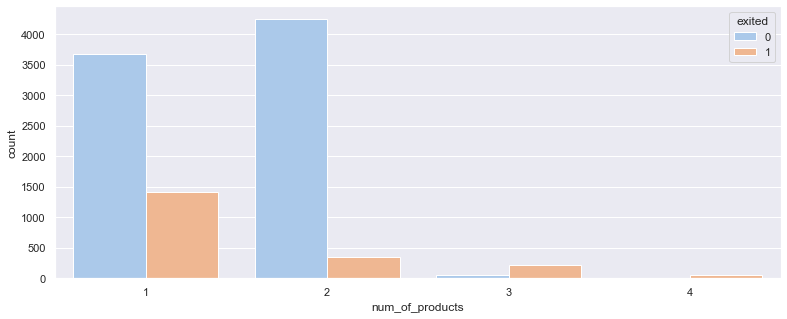

In [167]:
plt.figure(figsize = (13, 5))
sns.countplot('num_of_products', hue = 'exited', data = df, palette = 'pastel')

# customers that has 2 kinds of product has the highest retention rate
# the retention rate of customers who has 4 products is 0

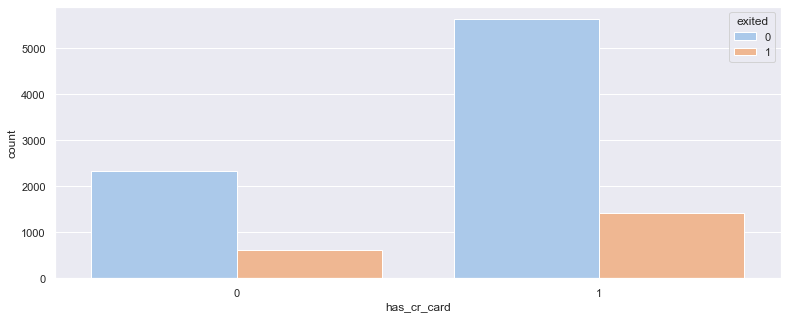

In [169]:
plt.figure(figsize = (13, 5))
sns.countplot('has_cr_card', hue = 'exited', data = df, palette = 'pastel')


### INSIGHT

- Total From this dataset there are 80% of retained customers and 20% churned customers
- 70 % of customers has credit cards
- Customers who has more than 2 products high likely will churn
- The retention rate of customer who has 4 products is 0%
- Female customers are more likely to churn compared to male customers
- Active customers are more likely to retained to non active customers
- Average balance of churned customers are higher compared to customer who retained
- Churned customers has more fluctuative balance during their tenure compared to retained
- Germany is the country with the highest churn rate
- Poor credit score has the highest churn rate among all group

### Recommendation

- Do not offer customers that already bought / subscribed to 2 products 
    - the data shown customers who have more than 2 products are more likely to churn
    - Remove the option to buy more than 3 products, since it has 0% retention rate
- Bank should allocate their recources of retention program for women
- Bank should make tools to make customers interact more with their systems (E-Banking, M-Banking, etc)
    - This is Because active customer has higher retention rate compared to the non active customers
- Have a loyalty program and extra customer service for high balance account
    - Since the average of churned customers has higher balance compared to retained customer, having this kind of programme hopefully will help retained customer with higher balance


In [ ]:
## Insight on [85][84][94][98][105][83][130][114][137][144][149]